In [4]:
from EchellePlotter import EchellePlotter
%matplotlib notebook

In [5]:
import numpy as np
import pandas as pd
from astropy.convolution import convolve, Box1DKernel

In [6]:
# Read in csv
ps_df = pd.read_csv("KIC9773821_PS.csv")

# Prepare numpy array data
freq = ps_df.freq.to_numpy()
pows = ps_df.pows.to_numpy()

amp = np.sqrt(pows)
df=freq[1]-freq[0]
smooth = .1/df  # in muHz
amp=convolve(amp, Box1DKernel(smooth))

In [7]:
Dnu = 8.10 # large frequency separation (muHz)
fmin = 102 - 30
fmax = 102 + 30

DP = 194.0 # period spacing

Period echelle can be plotted alongside when **plot_period=True** and **DP_min, DP_max, pstep** are given.

Colors and markers of the labels can be customized by passing in a dictionary of l-mode values and string of colors and markers that matplotlib recognizes.

To choose a l-mode label to be connected by dotted lines in ascending frequency order in the period plot, pass in l mode integer values to **plot_line** as a list.

Adjust frequency modulo by left and right arrow keys. Adjust period modulo by 'h' and 'l' (vim-like). Choose the l mode to label on the top left, and click on either plot to label points. To undo a label, click the undo button on the bottom left.

To produce high quality plots, it is recommended to run EchellePlotter from a Python script, where a matplotlib figure window will pop up after **.show()** is called explicitly.

<IPython.core.display.Javascript object>


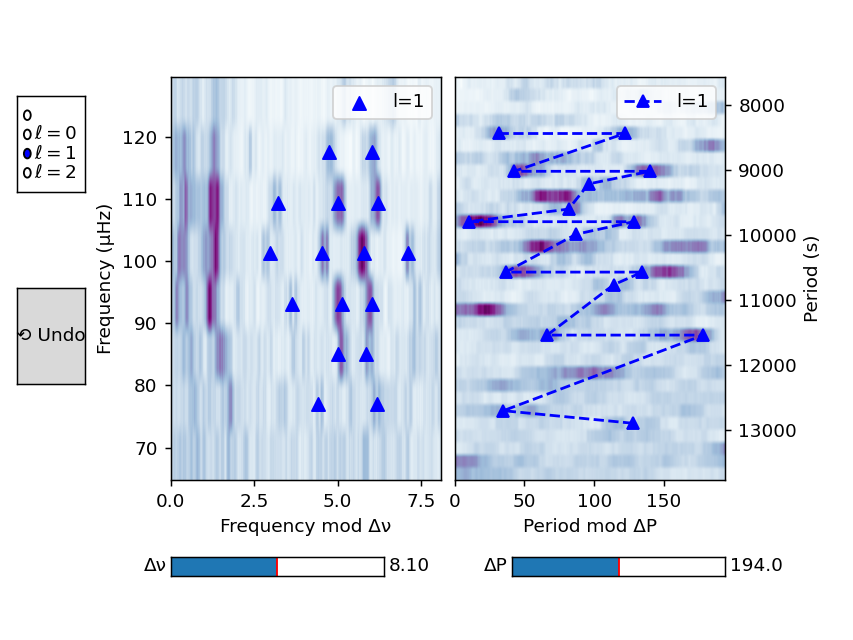

In [9]:
e = EchellePlotter(freq, amp, Dnu_min=Dnu-3, Dnu_max=Dnu+3, step=.05,
    fmin=fmin, fmax=fmax,
    plot_period=True,  DP_min=DP-10, DP_max=DP+10, pstep=0.1,
    colors={0:"red", 1:"blue", 2:"red"},
    markers={0: "o", 1:"^", 2:"s"},
    plot_line=[1])